# (Ford Gobike Data Exploration)
## by (Mustafa Awny)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
data = pd.read_csv('/content/201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 19.6+ MB


In [5]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000


In [6]:
data.shape

(183412, 14)

### What is the structure of your dataset?

The data has 183,412 trip record of FordBike with features(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, bike_share_for_all_trip)


### What is/are the main feature(s) of interest in your dataset?
The start station, end station, user type and trip duration are the most inetresting features for me.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think that the trip duration is the jey feature that has an influence on the riders. So, I will investigate mthe start and end stations as well as the customer type.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [7]:
# change the data type for start and end time to be datetime64[ns] 
data.start_time = pd.to_datetime(data.start_time)
data.end_time = pd.to_datetime(data.end_time)

### I will start investigating the duration_sec feature

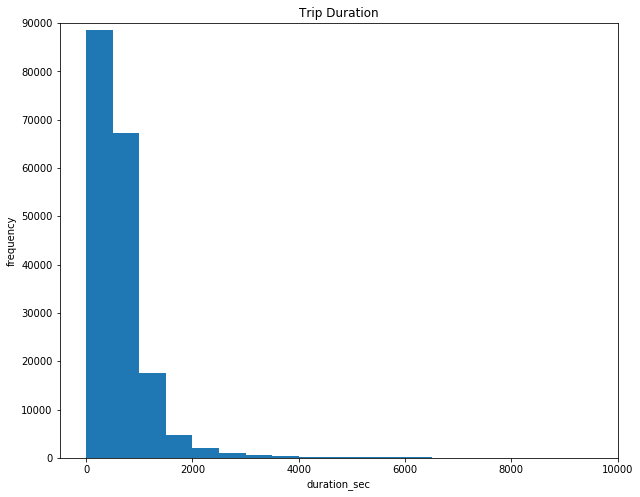

In [8]:
plt.figure(figsize=[10, 8])
binsize = 500
bins = np.arange(0, data['duration_sec'].max()+binsize, binsize)
plt.hist(data = data, x = 'duration_sec', bins = bins)
plt.title('Trip Duration')
plt.xlabel('duration_sec')
plt.ylabel('frequency')
plt.axis([-500, 10000, 0, 90000])
plt.show()

### We can see that most of the distribution values are less than 2000 seconds. This corresponds to increase in Number of Trips values and then, ungradual decrease till values are less than 20000.

## Start Stations Investigation

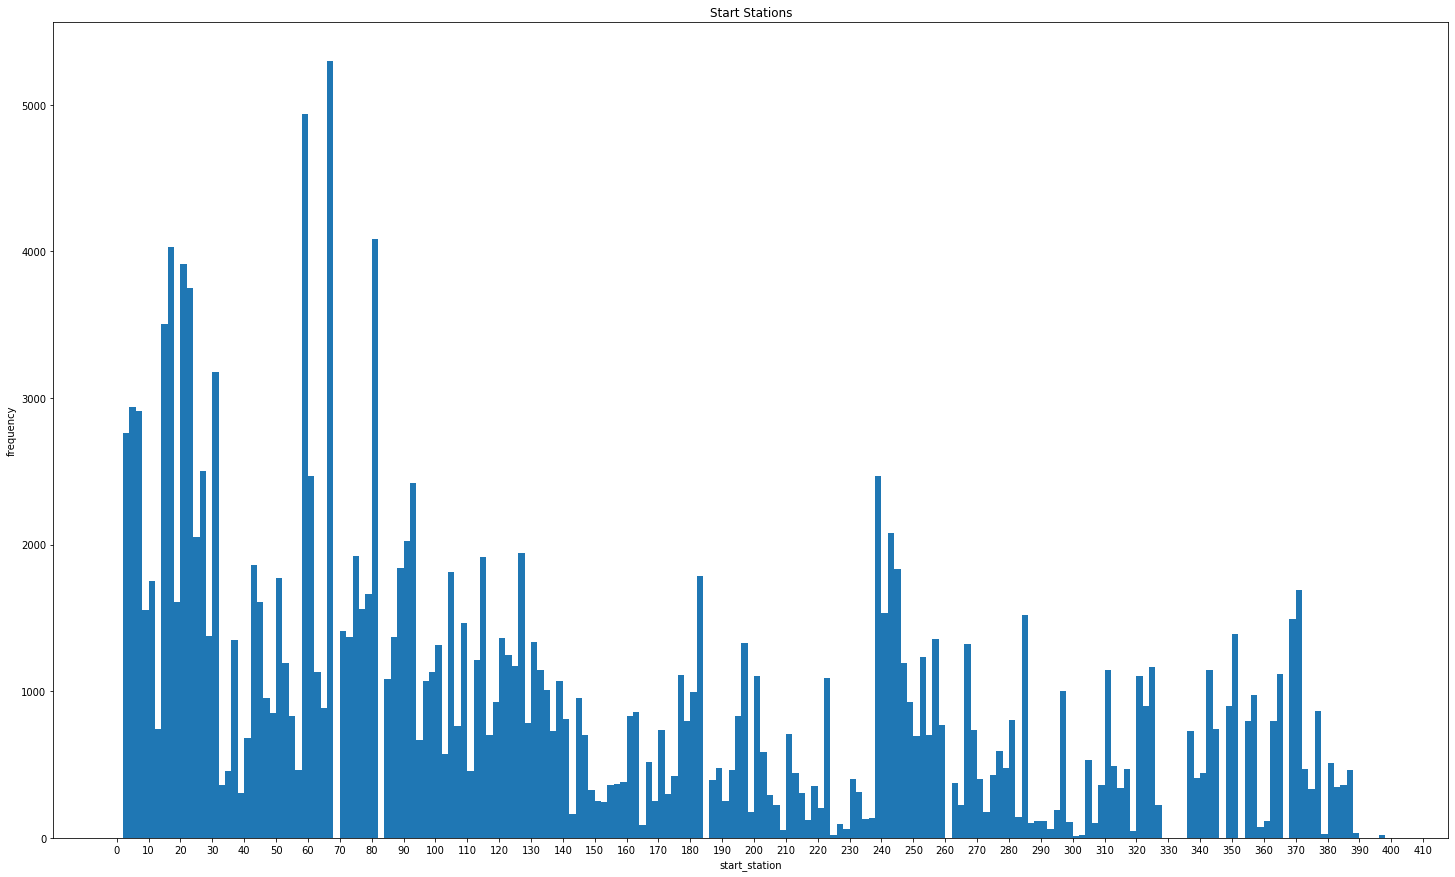

In [9]:
# Plotting start station id distribution on a standard scale
binsize = 2
bins = np.arange(0, data['start_station_id'].astype(float).max()+binsize, binsize)
plt.figure(figsize=[25, 15])
plt.xticks(range(0, 420, 10))
plt.hist(data = data, x = 'start_station_id', bins = bins)
plt.title('Start Stations')
plt.xlabel('start_station')
plt.ylabel('frequency')
plt.show()

### We have a peak of 5000 stations and 0 stations as the min value which is interesting.




## End Stations

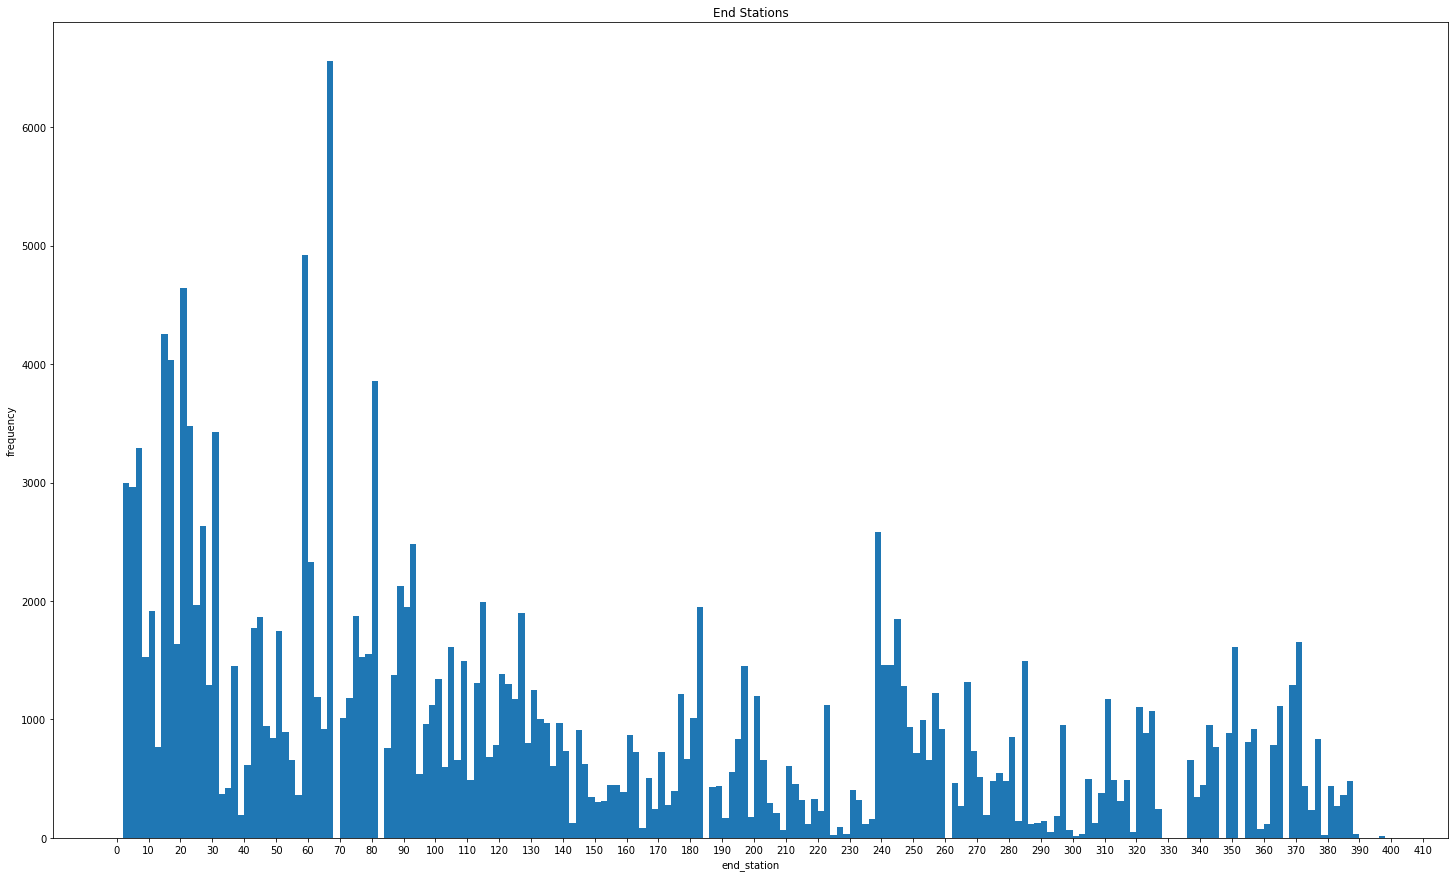

In [10]:
# Plotting end station id distribution.
binsize = 2
bins = np.arange(0, data['end_station_id'].astype(float).max()+binsize, binsize)
plt.figure(figsize=[25, 15])
plt.xticks(range(0, 420, 10))
plt.hist(data = data, x = 'end_station_id', bins = bins)
plt.title('End Stations')
plt.xlabel('end_station')
plt.ylabel('frequency')
plt.show()


### We have a peak of more than 6000 end stations which indiactes more destinations as the number is less than the start stations.

## User Type Investigation

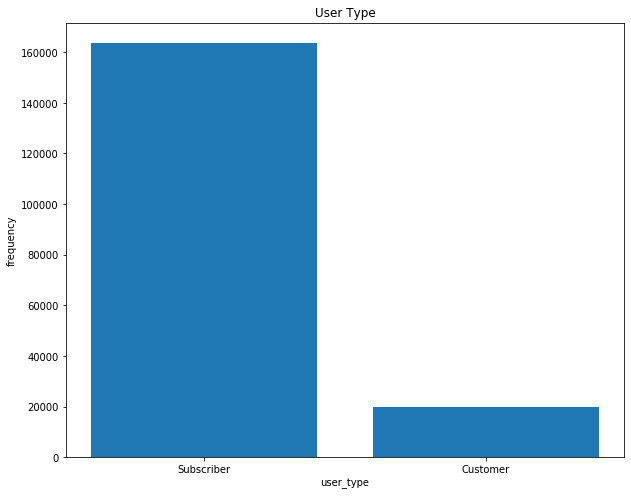

In [11]:
# plotting types of users 
plt.figure(figsize=[10,8])
plt.bar(x = data['user_type'].value_counts().keys(), height = data['user_type'].value_counts())
plt.title('User Type')
plt.xlabel('user_type')
plt.ylabel('frequency')
plt.show()

### Obviously, we can see that most of the users are subscribers or in other words, members.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The trip duration has a  high frequency which is concentrated at 600 seconds peak. I think all the plots are reasonable. I did not need to do any feature transformation till now
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

As I mentioned, no tarnsformation is needed till now. I just needed to tune some parameters to be able to visualize the data in a better format.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Trip Duration vs Start Station

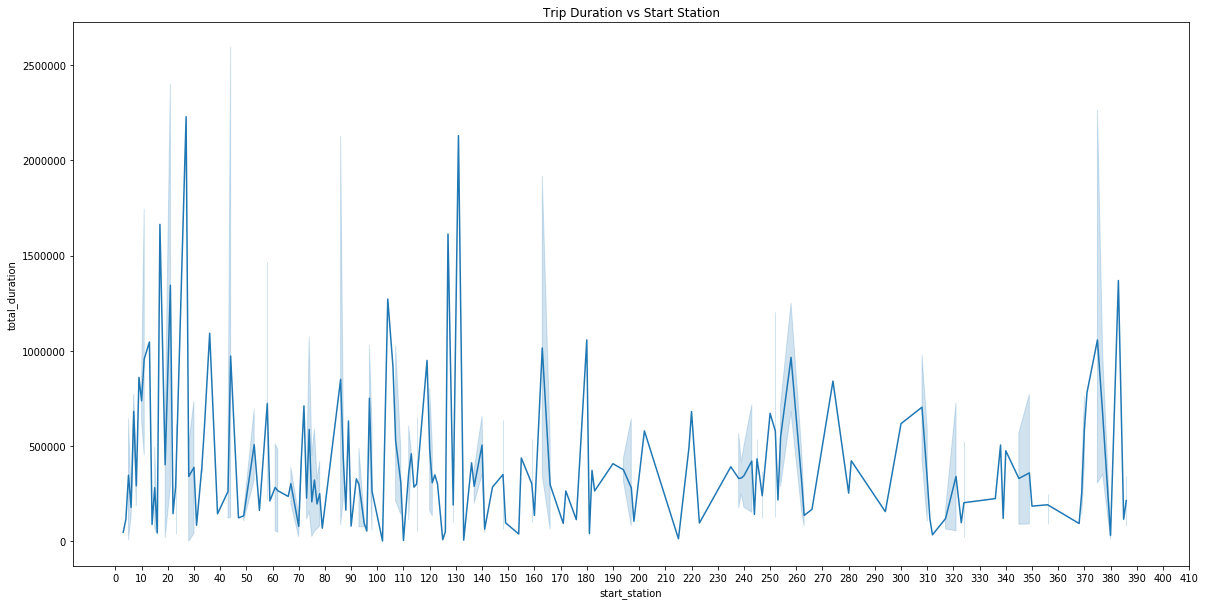

In [12]:
temp = []
# we have to do the sorting to be able to visualize the data properly
ids = sorted(data['start_station_id'].unique())
for id in ids :
    temp.append(data[data['start_station_id'] == id].duration_sec.sum())
# we have to concert it to pandas series to avoid any warnings
y = pd.Series(temp)
plt.figure(figsize = [20, 10])
sb.lineplot(x = data['start_station_id'], y = y)
plt.xticks(range(0, 420, 10))
plt.title('Trip Duration vs Start Station')
plt.xlabel('start_station')
plt.ylabel('total_duration')
plt.show()

### I do not think that there is a specfic trend or seasonal event related to the start station id.

## Trip Duration vs End Station

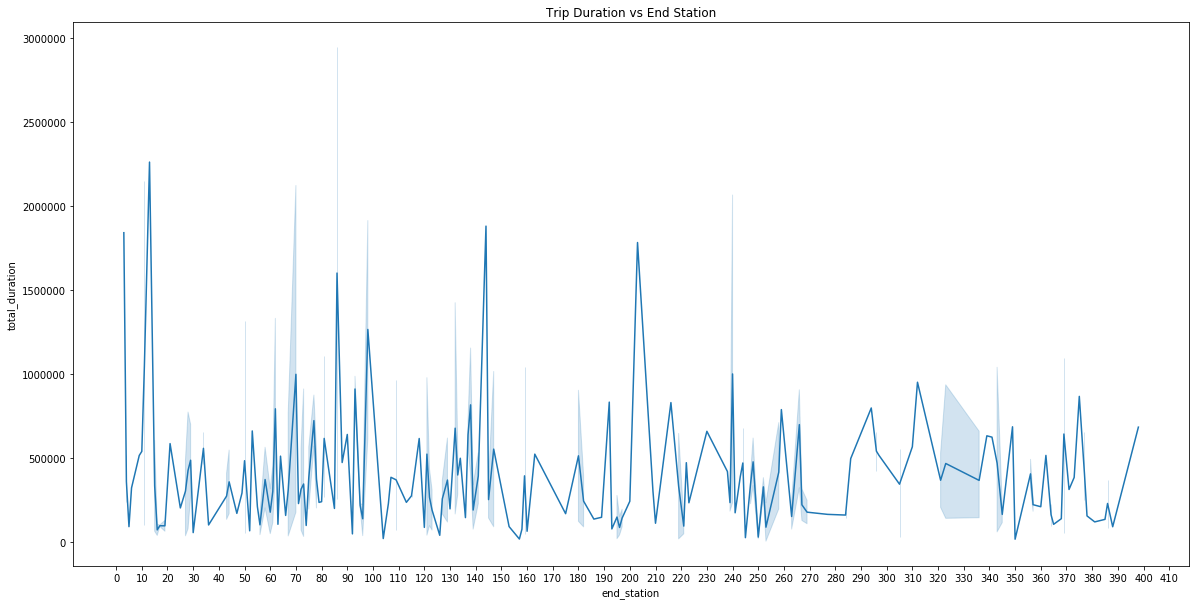

In [13]:
temp = []
ids = sorted(data['end_station_id'].unique())
for id in ids :
    temp.append(data[data['end_station_id'] == id].duration_sec.sum()) 
y = pd.Series(temp)
plt.figure(figsize = [20, 10])
sb.lineplot(x = data['end_station_id'], y = y)
plt.xticks(range(0, 420, 10))
plt.title('Trip Duration vs End Station')
plt.xlabel('end_station')
plt.ylabel('total_duration')
plt.show()

### We can reach the same observation of the start stations and we can conclude that stations dominate when it comes to the trip duration.

## Trip Duration vs User Type

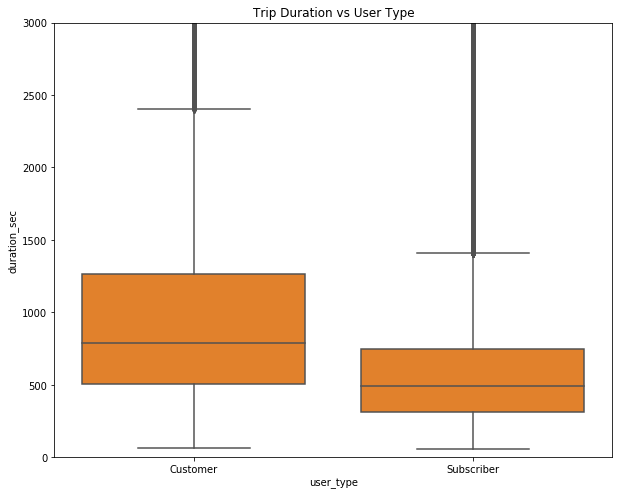

In [14]:
plt.figure(figsize = [10, 8])
base_color = sb.color_palette()[1]
sb.boxplot(data = data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([0, 3000])
plt.title('Trip Duration vs User Type')
plt.xlabel('user_type')
plt.ylabel('duration_sec')
plt.show()

### It is interesting to see that customers, non-members, have longer trips!





### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is no direct correlation between the start and end stations and the trip duration.

We can see that the casual customers tend to have longer trips than the subscribers.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, as I mentioned before, It was interesting to see that casuals, non-members, have longer trips!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### I do not think there is a direct relationship among 3 features of the dataset. So, I will do some feature engineering to be able to get more insights.

In [15]:
data['duration_minute'] = data['duration_sec']/60

data['start_date'] = data['start_time'].dt.strftime('%Y-%m-%d')
data['hour_of_day'] = data['start_time'].dt.strftime('%H')
data['day_of_week'] = data['start_time'].dt.strftime('%A')
data['start_month'] = data['start_time'].dt.strftime('%B')

data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,hour_of_day,day_of_week,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Yes,26.416667,2019-02-28,23,Thursday,February


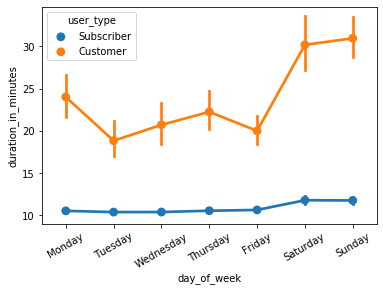

In [23]:
data['user_type'] = data['user_type'].astype('category')
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day_cat = pd.api.types.CategoricalDtype(ordered=True, categories=week_day)
data['day_of_week'] = data['day_of_week'].astype(week_day_cat)
sorted_values = data['user_type'].value_counts()/data.shape[0];

sb.pointplot(data=data, x='day_of_week', y='duration_minute', hue='user_type', hue_order=sorted_values.index);
plt.xlabel('day_of_week');
plt.ylabel('duration_in_minutes');
plt.xticks(rotation=30);

### We can see that Saturday and Sunday have the highest trip duration which makes sense as people tend to return back to their home places in weekends. So, thers is a seasonal trend of trip duration increase in these days.

## I got the idea of this visulaiztion from another notebook and I refomulated to fit the dataset new features.

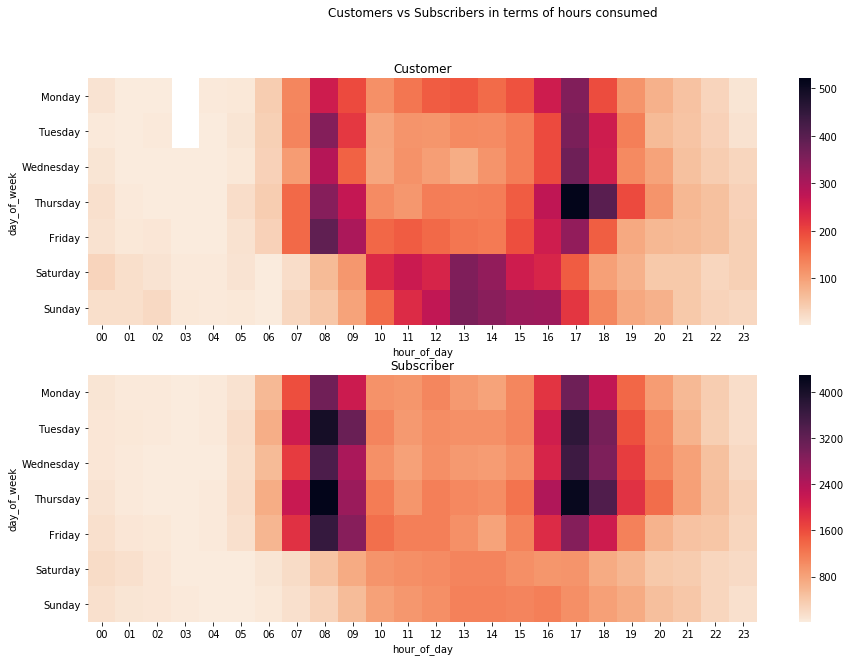

In [21]:
plt.figure(figsize=(15, 10))
plt.suptitle('Customers vs Subscribers in terms of hours consumed')
plt.subplot(2, 1, 1)
customer = data[data['user_type'] == "Customer"]
count = customer.groupby(['day_of_week', 'hour_of_day']).size()
count = count.reset_index(name='count')
count = count.pivot(index='day_of_week', columns='hour_of_day', values='count')
sb.heatmap(count, cmap='rocket_r');
plt.title('Customer');
plt.xlabel('hour_of_day');
plt.ylabel('day_of_week');

plt.subplot(2, 1, 2)
subscriber = data[data['user_type'] == "Subscriber"]
count1 = subscriber.groupby(['day_of_week', 'hour_of_day']).size()
count1 = count1.reset_index(name='count')
count1 = count1.pivot(index='day_of_week', columns='hour_of_day', values='count')
sb.heatmap(count1, cmap='rocket_r');
plt.title('Subscriber');
plt.xlabel('hour_of_day');
plt.ylabel('day_of_week');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration supported the previous bivariate exploration as well as univariate exploration results. We also concluded that the day of week influence the trip duration, especially in days before weekends.
### Were there any interesting or surprising interactions between features?

All the results made sense for me and supported each other.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!